# Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# hyperparameters
n_dim = 5

In [3]:
x = load_wine()['data']
x.shape # actual data shape

(178, 13)

In [4]:
x = x - np.mean(x,axis=0)

In [5]:
# get number of features (columns)
n_ft = x.shape[1]

In [6]:
# covariance matrix of x
s = np.cov(x,rowvar=False)

# eigenvalues and eigenvectors of covariance matrix
# these show the magnitude and corresponding direction
eig_val, eig_vec = np.linalg.eig(s)

In [7]:
eig_val

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 8.20370314e-03, 2.10723661e-02, 3.75759789e-02,
       7.17026032e-02])

In [8]:
#eig_vec

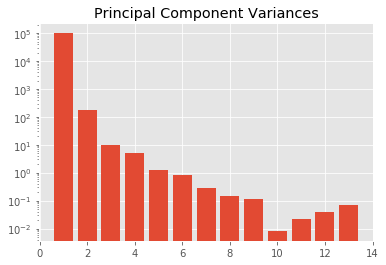

In [9]:
# how much each components explains variance
plt.bar(np.arange(n_ft)+1,eig_val)
plt.yscale('log')
plt.title('Principal Component Variances')
plt.show()

In [10]:
# percentage of magnitudes
eig_val/np.sum(eig_val)

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 8.25392788e-08, 2.12013755e-07, 3.78060267e-07,
       7.21415811e-07])

In [11]:
# reduced dimensions
x_hat = np.dot(x,eig_vec[:,:n_dim])

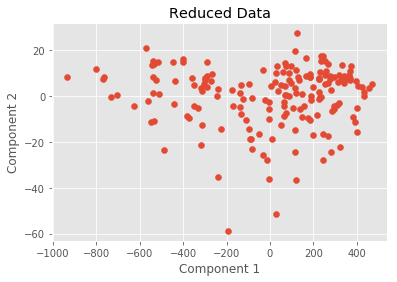

In [12]:
plt.scatter(x_hat[:,0],x_hat[:,1])
plt.title('Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [13]:
# reproduce x back from reduced space
x_2 = np.dot(x_hat,eig_vec[:,:n_dim].T)

In [14]:
x_2.shape # same dimensions with actual data

(178, 13)

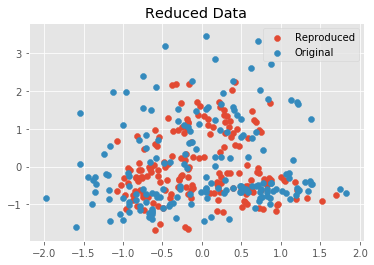

In [15]:
# just for comparison, plot first two features
plt.scatter(x_2[:,0],x_2[:,1],label='Reproduced')
plt.scatter(x[:,0],x[:,1],label='Original')
plt.title('Comparison')
plt.legend()
plt.show()

In [16]:
# total reproduction error
np.sum(np.abs(x - x_2))

472.2812943176757